**Task 1 — Iris Dataset (Exploration & Visualization)**

**Problem statement / Goal**

Explore the classic Iris dataset to understand feature distributions and relationships across species. Produce visualizations (scatter, histograms, boxplots) and short insights useful for a report.

Shape: (150, 5)

Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

First 5 rows:
    sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 

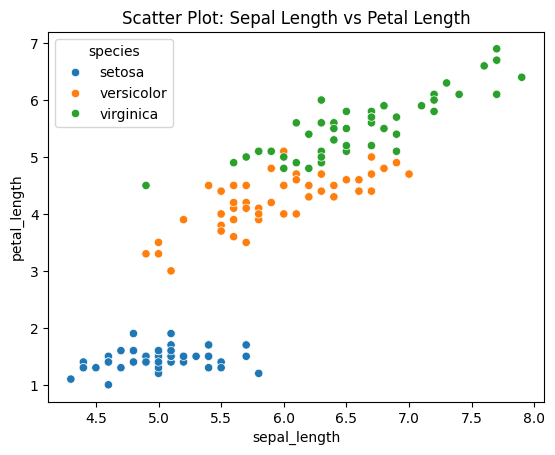

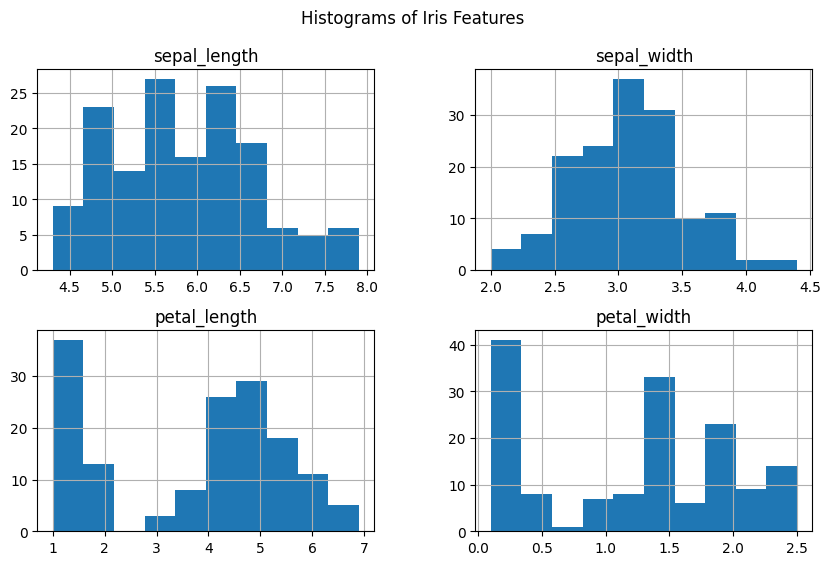

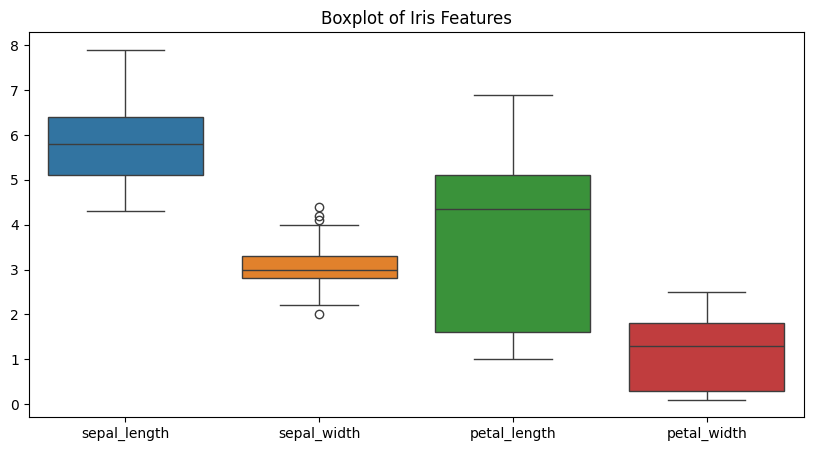


✔ Task 1 Completed!


In [1]:
# -------------------- TASK 1: IRIS DATASET EXPLORATION --------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset
df = sns.load_dataset("iris")

# Basic info
print("Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nFirst 5 rows:\n", df.head())

# Info & summary
print("\nDataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

# ---- Scatter Plot ----
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species')
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.show()

# ---- Histograms ----
df.hist(figsize=(10,6))
plt.suptitle("Histograms of Iris Features")
plt.show()

# ---- Boxplots ----
plt.figure(figsize=(10,5))
sns.boxplot(data=df)
plt.title("Boxplot of Iris Features")
plt.show()

print("\n✔ Task 1 Completed!")


**Task 3 — Heart Disease Prediction (Kaggle UCI Heart Dataset)**

**Problem statement / Goal**

Predict whether a patient has heart disease (binary classification). Provide EDA, preprocessing, model training (Logistic Regression), evaluation (accuracy, confusion matrix, ROC), and feature importance discussion.

**Note:** Two dataset-loading options provided: (A) Kaggle download (requires kaggle.json) and (B) upload/extract a ZIP you already have. Use whichever is easier.

In [6]:
!pip install kaggle
from google.colab import files
files.upload()   # upload kaggle.json
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving heart.csv to heart (1).csv
mkdir: cannot create directory ‘/root/.kaggle’: File exists
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

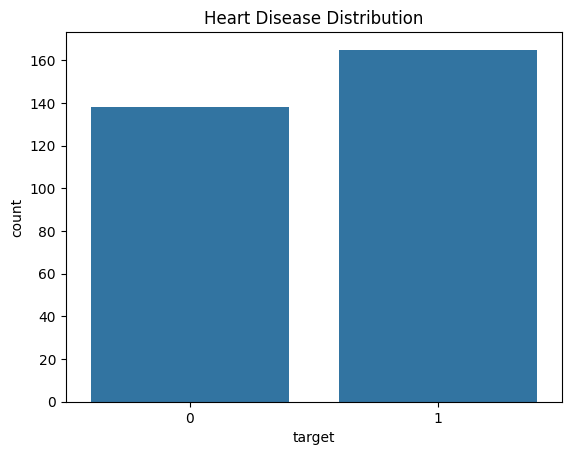

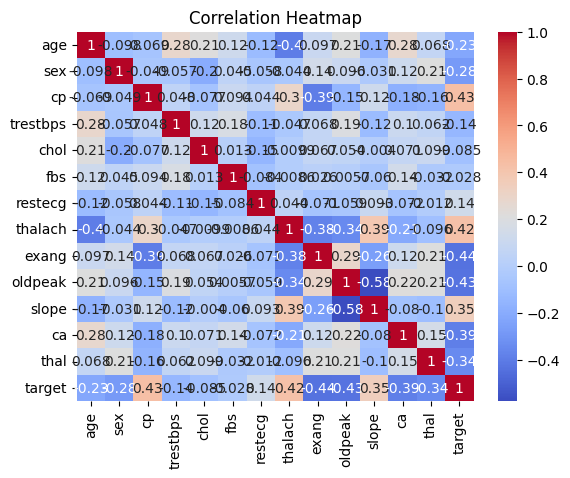

Accuracy: 0.8524590163934426


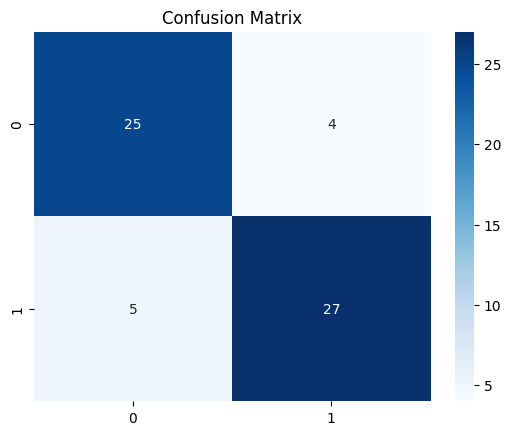

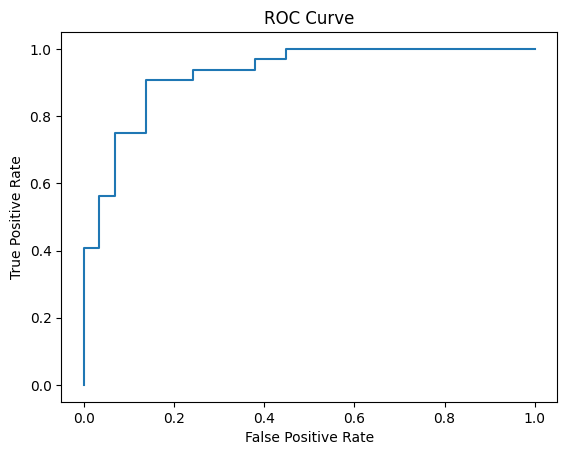


✔ Task 3 Completed!


In [9]:
# -------------------- TASK 3: HEART DISEASE PREDICTION --------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv("/content/heart.csv")

print(df.head())
print(df.info())
print(df.describe())

# ---- EDA ----
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution")
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ---- Split Data ----
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

X = df.drop("target", axis=1)
y = df["target"]

# Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---- Model ----
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# ---- Evaluation ----
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("\n✔ Task 3 Completed!")


**Task 6 — House Price Prediction (Regression)**

**Problem statement / Goal**

Predict house prices using features such as sqft_living, bedrooms, bathrooms, and floors. Create train/test CSVs, train a Linear Regression model, and evaluate with MAE and RMSE.

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

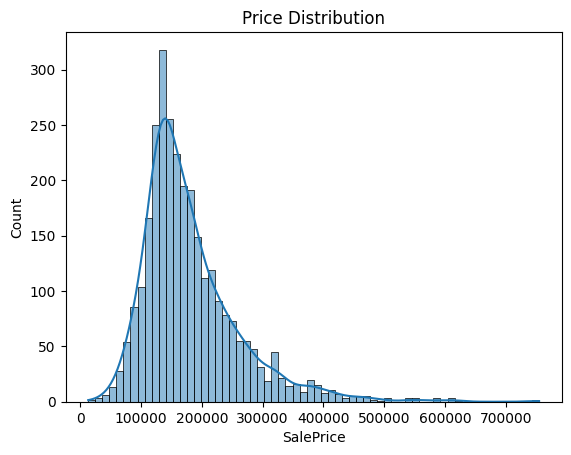

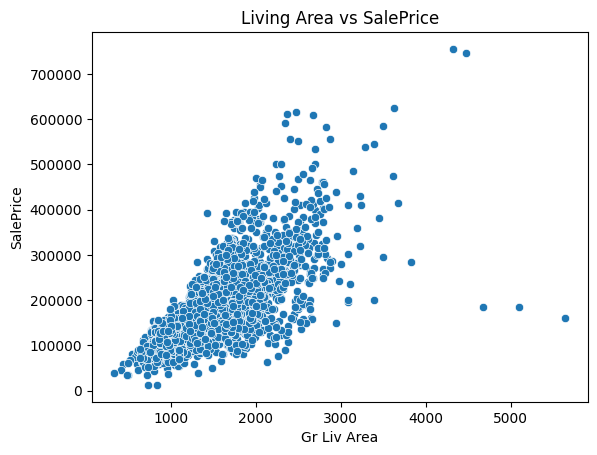

MAE: 37095.53294905583
RMSE: 56011.22282873701


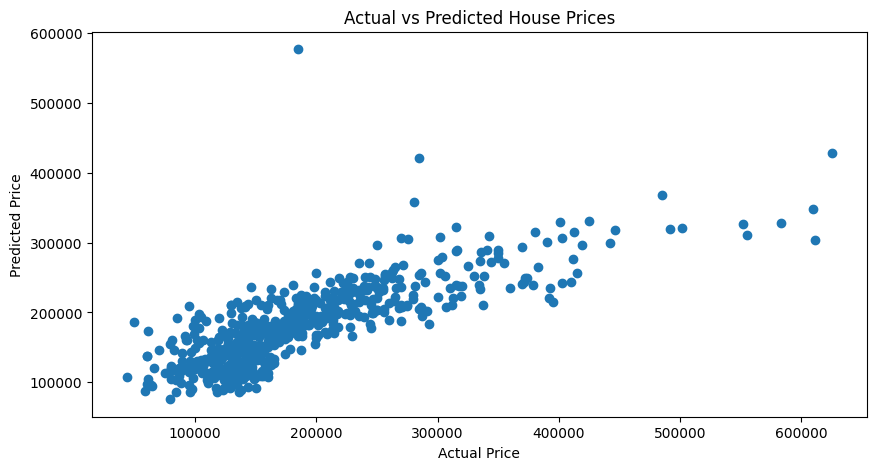


✔ Task 6 Completed!


In [12]:
# -------------------- TASK 6: HOUSE PRICE PREDICTION --------------------

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Housing.csv")

print(df.head())
print(df.info())
print(df.describe())

# EDA
# Corrected 'price' to 'SalePrice' and 'sqft_living' to 'Gr Liv Area'
sns.histplot(df['SalePrice'], kde=True)
plt.title("Price Distribution")
plt.show()

sns.scatterplot(x=df['Gr Liv Area'], y=df['SalePrice'])
plt.title("Living Area vs SalePrice")
plt.show()

# ----------- Preprocessing -----------
# Corrected column names to match the Housing.csv dataset
df = df[['Gr Liv Area', 'Bedroom AbvGr', 'Full Bath', 'TotRms AbvGrd', 'SalePrice']]
df = df.dropna()

X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# ----------- Evaluation -----------
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

print("\n✔ Task 6 Completed!")